In [ ]:
#Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap


In [ ]:
# load the data
df = pd.read_csv('data/HR_data.csv')

cohort_to_session = {
    'D1_1': 'D11',  # winter
    'D1_2': 'D12',  # Fall
    'D1_3': 'D13',  # fall
    'D1_4': 'D13',  # fall
    'D1_5': 'D13',  # fall
    'D1_6': 'D13',  # fall
}

# Create a new column
df['Session'] = df['Cohort'].map(cohort_to_session)

cohort_to_timeCompleted = {
    'D1_1': 'Unknown',  # winter
    'D1_2': 'Unknown',  # Fall
    'D1_3': 'Morning',  # fall
    'D1_4': 'Evening',  # fall
    'D1_5': 'Morning',  # fall
    'D1_6': 'Evening',  # fall
}

df['TimeCompleted'] = df['Cohort'].map(cohort_to_timeCompleted)

In [ ]:
# Drop rows with missing values
# df = df.dropna()

# Separate categorical and numerical data
numerical_data = df.select_dtypes(include=["number"])
categorical_columns = ["Round", "Phase", "Cohort", "Session", "TimeCompleted"]
categorical_data = df[categorical_columns]

# one hot encoding for categorical data
categorical_data = pd.get_dummies(categorical_data, columns = ["Round", "Phase", "Cohort", "Session", "TimeCompleted"],drop_first=True)

# Concatinate the numerical and categorical data
data = pd.concat([numerical_data, categorical_data], axis=1)

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
rounds = df["Round"]
phases = df["Phase"]
cohorts = df["Cohort"]
cohorts_session = df["Session"]
cohortts_timeCompleted = df["TimeCompleted"]

In [ ]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
    
def plot_kernel(kernel):
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))

    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.1) # {'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'}
    kpca_components = kpca.fit_transform(data_scaled)

    kpca_df = pd.DataFrame(kpca_components, columns=["KPCA_1", "KPCA_2"])
    kpca_df["Round"] = rounds.values
    kpca_df["Phase"] = phases.values
    kpca_df["Cohort"] = cohorts.values
    kpca_df["Session"] = cohorts_session.values
    kpca_df["TimeCompleted"] = cohortts_timeCompleted.values

    sns.scatterplot(data=kpca_df, x="KPCA_1", y="KPCA_2", hue="Round", ax=axes[0], palette="Set2")
    axes[0].set_title("Kernel PCA colored by Round")
    axes[0].grid(True)

    sns.scatterplot(data=kpca_df, x="KPCA_1", y="KPCA_2", hue="Phase", ax=axes[1], palette="Set1")
    axes[1].set_title("Kernel PCA colored by Phase")
    axes[1].grid(True)

    sns.scatterplot(data=kpca_df, x="KPCA_1", y="KPCA_2", hue="Cohort", ax=axes[2], palette="Set3")
    axes[2].set_title("Kernel PCA colored by Cohort")
    axes[2].grid(True)

    sns.scatterplot(data=kpca_df, x="KPCA_1", y="KPCA_2", hue="Session", ax=axes[3], palette="Set3")
    axes[3].set_title("Kernel PCA colored by Cohort to Session")
    axes[3].grid(True)

    sns.scatterplot(data=kpca_df, x="KPCA_1", y="KPCA_2", hue="TimeCompleted", ax=axes[4], palette="Set3")
    axes[4].set_title("Kernel PCA colored by Cohort to Time Completed")
    axes[4].grid(True)

    plt.tight_layout()
    plt.show()

for k in kernel_list:
    plot_kernel(k)

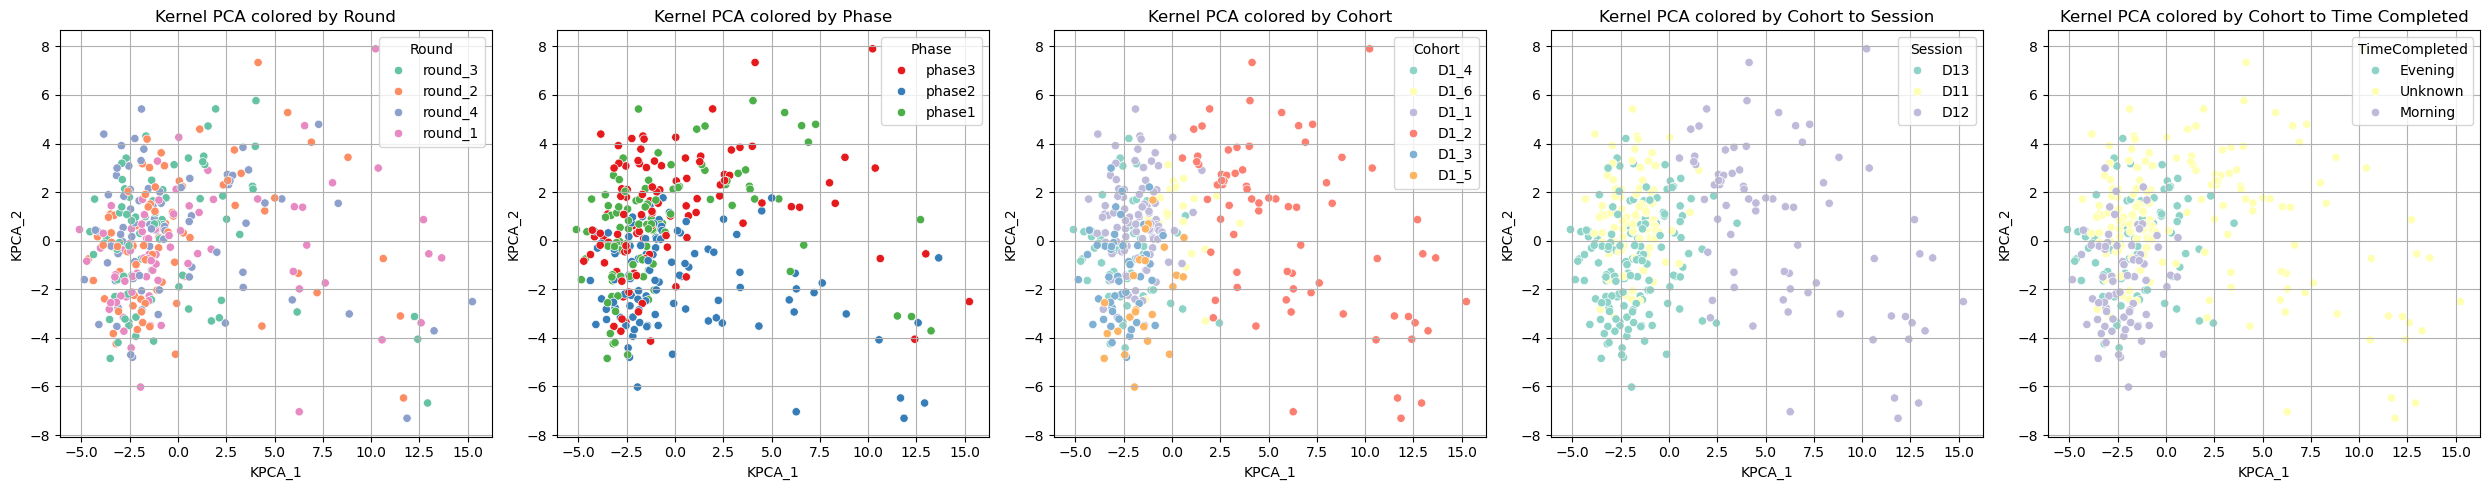

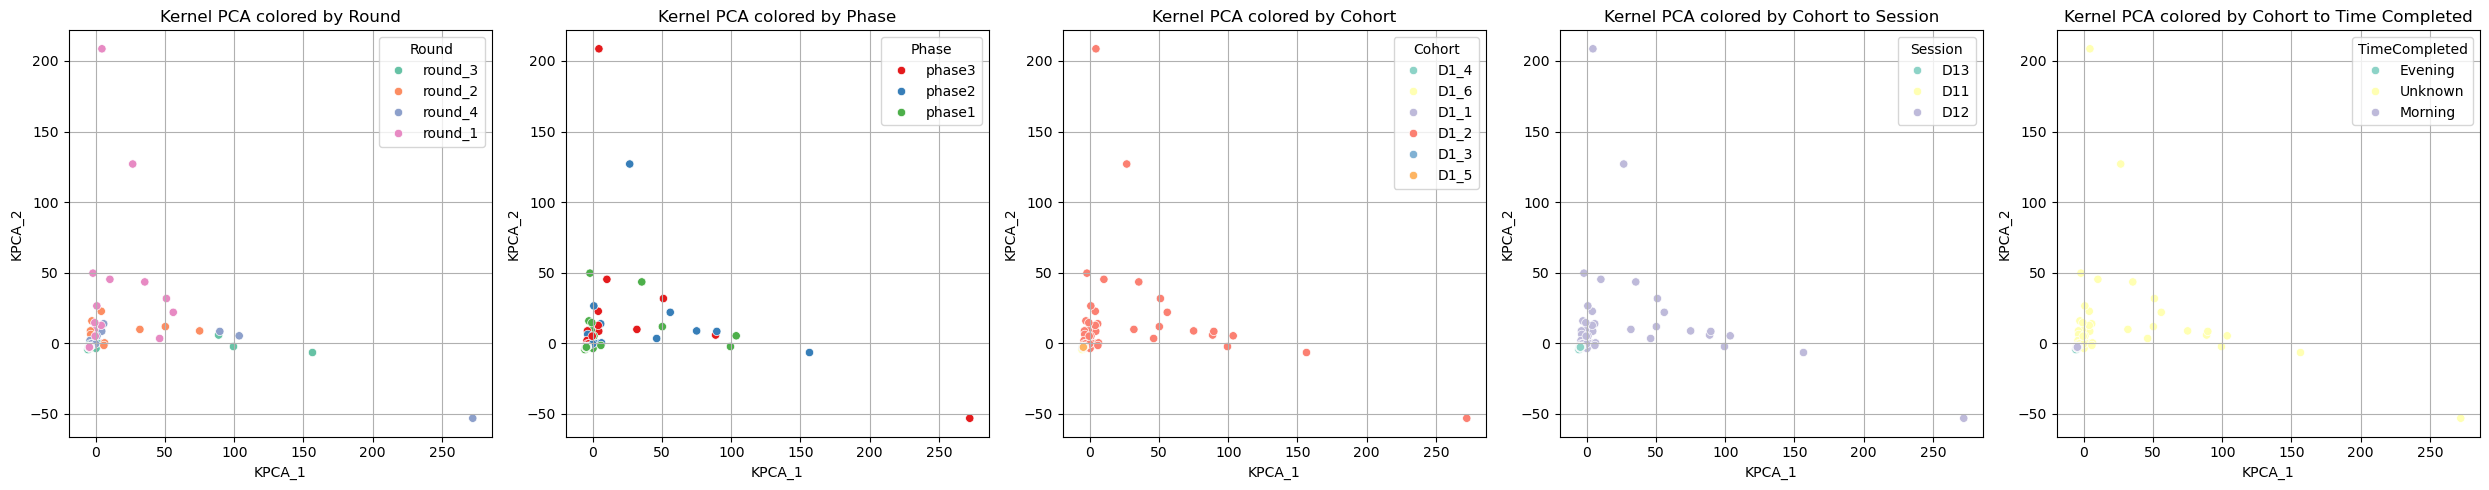

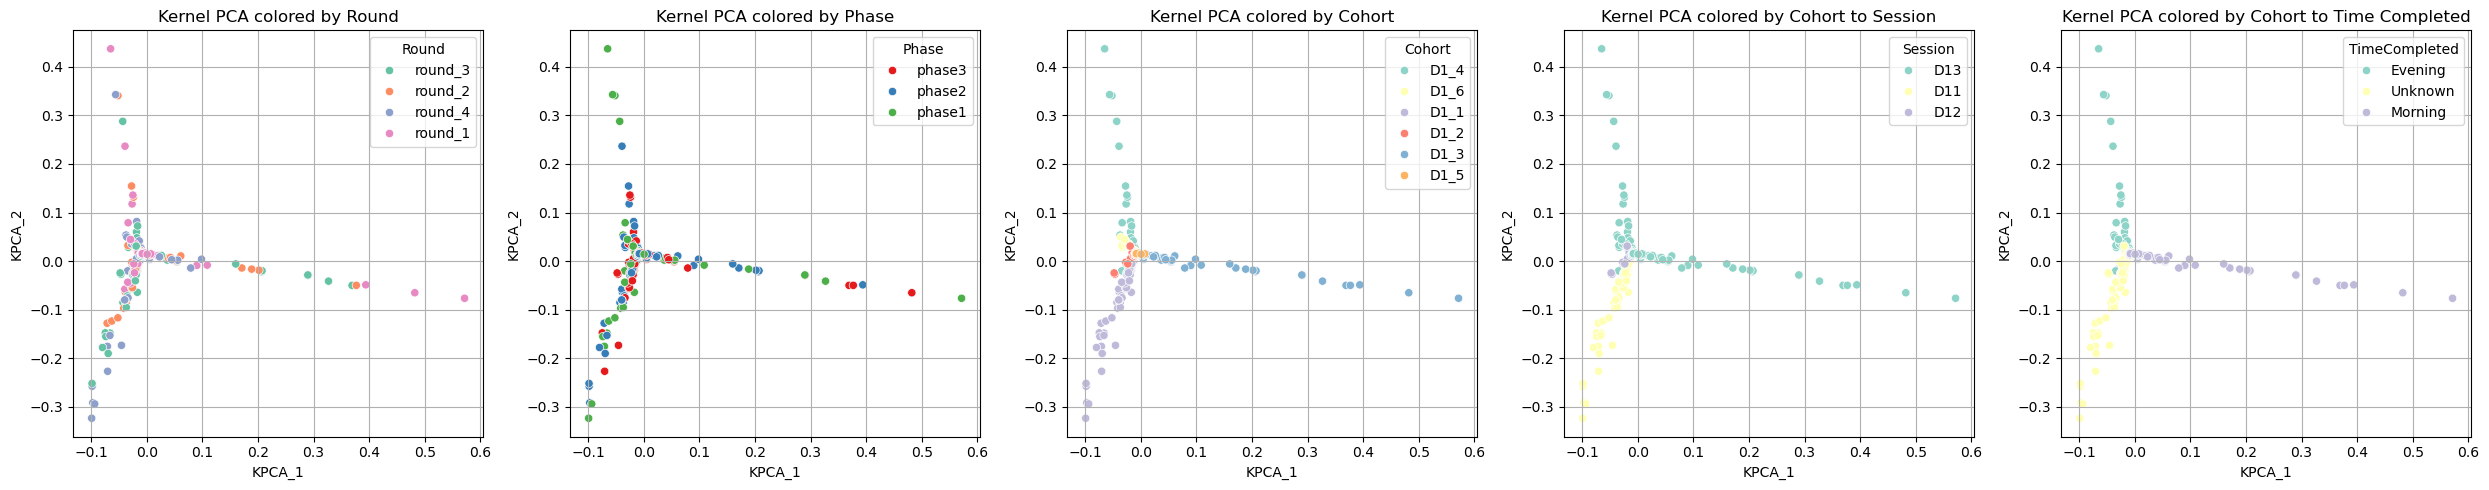

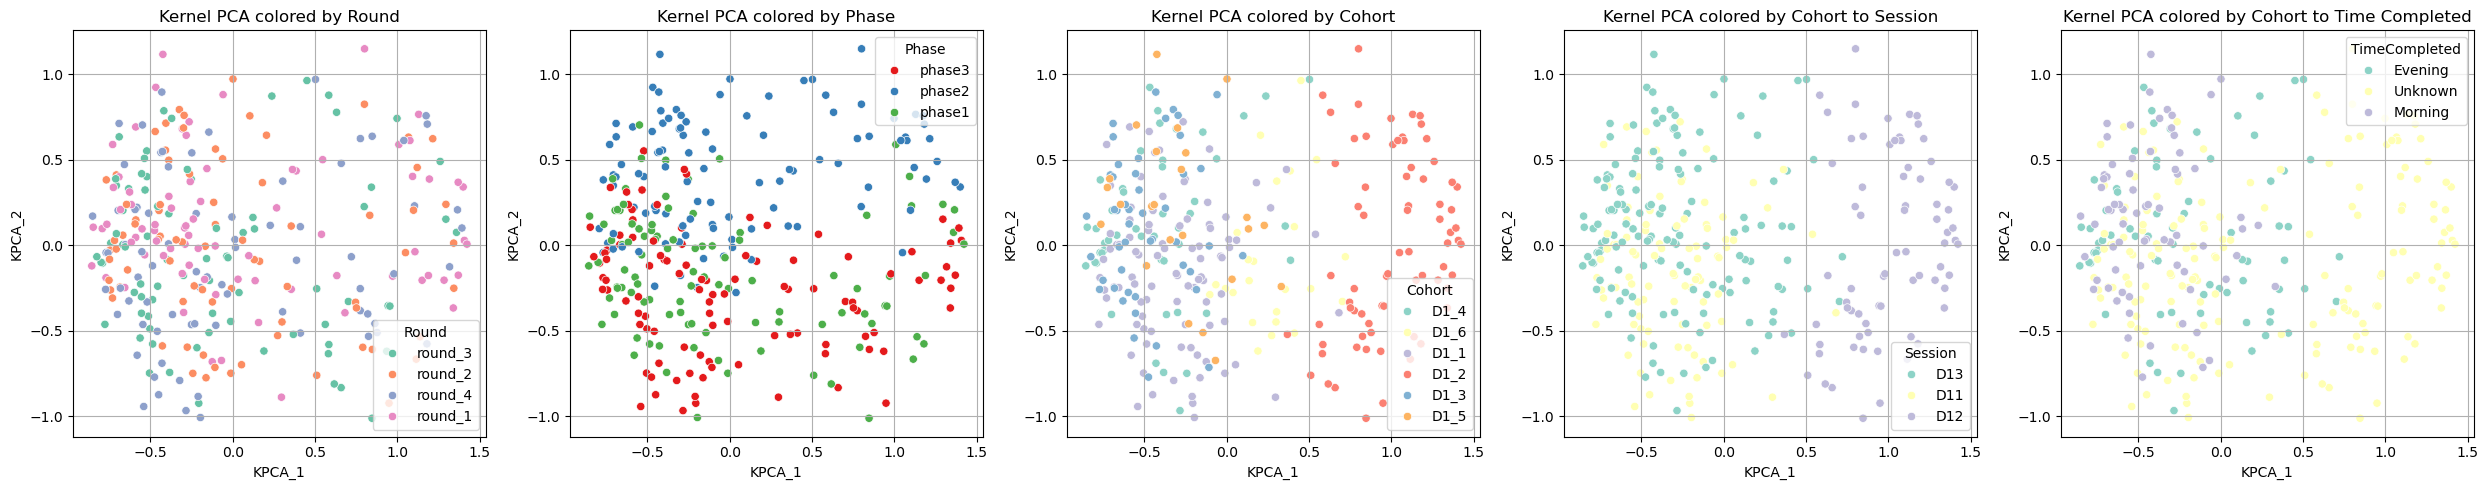

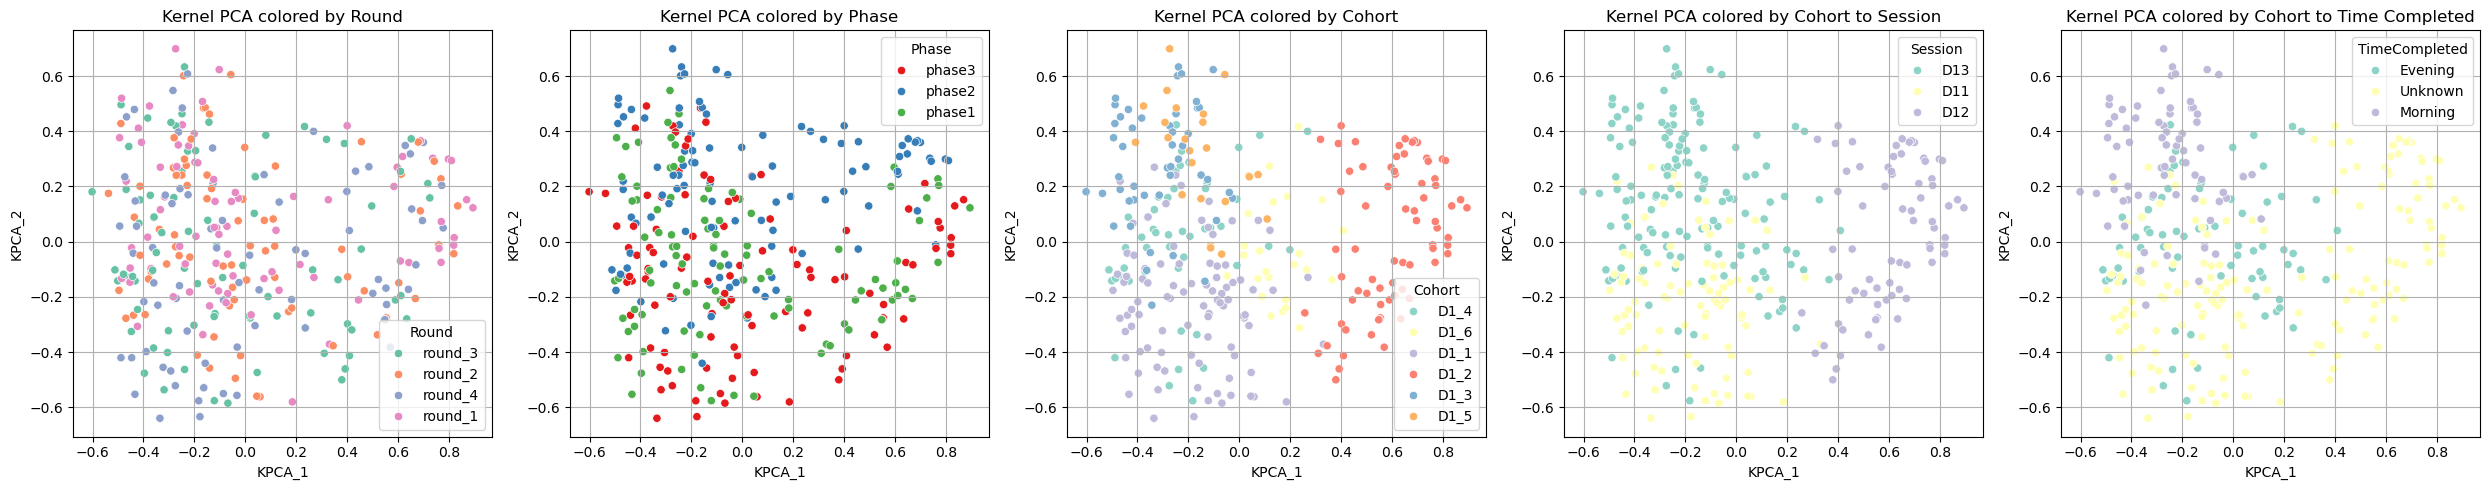

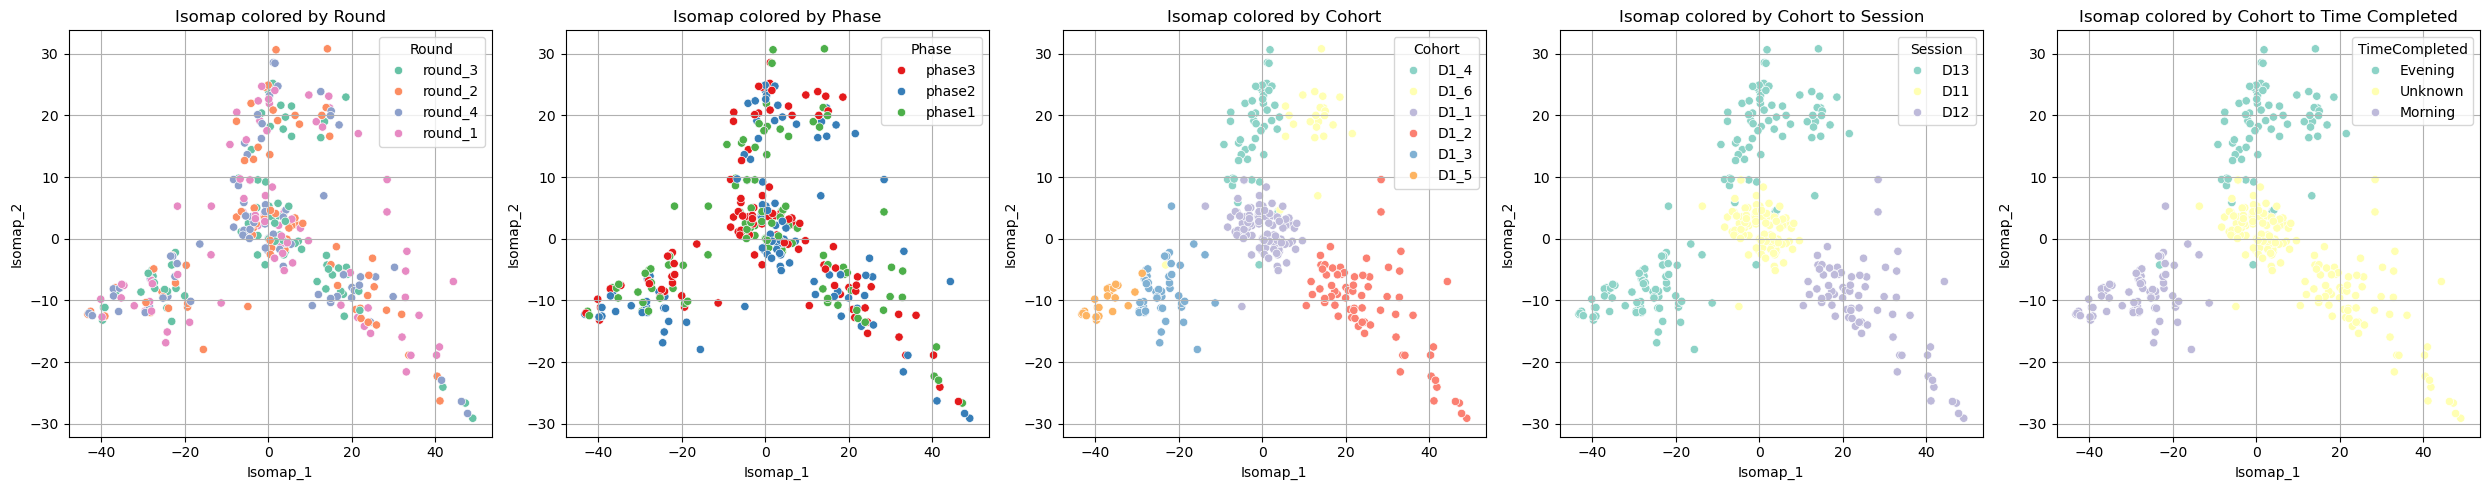

In [11]:
isomap = Isomap(n_neighbors=5, n_components=2)
isomap_components = isomap.fit_transform(data_scaled)

# Create a DataFrame for Isomap components
isomap_df = pd.DataFrame(isomap_components, columns=["Isomap_1", "Isomap_2"])

isomap_df["Round"] = rounds.values
isomap_df["Phase"] = phases.values
isomap_df["Cohort"] = cohorts.values
isomap_df["Session"] = cohorts_session.values
isomap_df["TimeCompleted"] = cohortts_timeCompleted.values

# Plot results of Isomap
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

sns.scatterplot(data=isomap_df, x="Isomap_1", y="Isomap_2", hue="Round", ax=axes[0], palette="Set2")
axes[0].set_title("Isomap colored by Round")
axes[0].grid(True)

sns.scatterplot(data=isomap_df, x="Isomap_1", y="Isomap_2", hue="Phase", ax=axes[1], palette="Set1")
axes[1].set_title("Isomap colored by Phase")
axes[1].grid(True)

sns.scatterplot(data=isomap_df, x="Isomap_1", y="Isomap_2", hue="Cohort", ax=axes[2], palette="Set3")
axes[2].set_title("Isomap colored by Cohort")
axes[2].grid(True)

sns.scatterplot(data=isomap_df, x="Isomap_1", y="Isomap_2", hue="Session", ax=axes[3], palette="Set3")
axes[3].set_title("Isomap colored by Cohort to Session")
axes[3].grid(True)

sns.scatterplot(data=isomap_df, x="Isomap_1", y="Isomap_2", hue="TimeCompleted", ax=axes[4], palette="Set3")
axes[4].set_title("Isomap colored by Cohort to Time Completed")
axes[4].grid(True)

plt.tight_layout()
plt.show()